In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


import pandas.testing as tm
%matplotlib inline


#Leemos las tablas

df0 = pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB.csv")

df1=pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB1.csv")


#REALIZANDO EDA: Determinamos que el ID ,VALIDATE SMILES,SMARTS son irrelevantes para el análsisis.


df0 = df0.drop(columns=['Microorganism','validate smiles','SMARTS','Compounds','SMILES','SELFIES'])

df0

,ID,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other
0,1,0,1,0,1,0,0,0
1,2,0,1,0,1,0,0,0
2,3,0,1,0,1,0,0,0
3,4,0,1,0,1,0,0,0
4,5,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...
216,277,2,0,0,0,0,0,0
217,278,0,1,0,2,0,0,1
218,279,0,1,0,2,0,0,1
219,280,0,0,0,2,0,0,1


In [3]:
np.sum(pd.isnull(df0).sum()) # Suma del recuento de objetos nulos en todas las columnas del data frame
df1.dropna(inplace=True) # Preprocesamiento: eliminamos filas con datos faltante
df0.dropna(inplace=True) # Preprocesamiento: eliminamos filas con datos faltante

<ipython-input-4-c254b684fe65>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='carboxylate',data=df0,palette='RdBu_r')


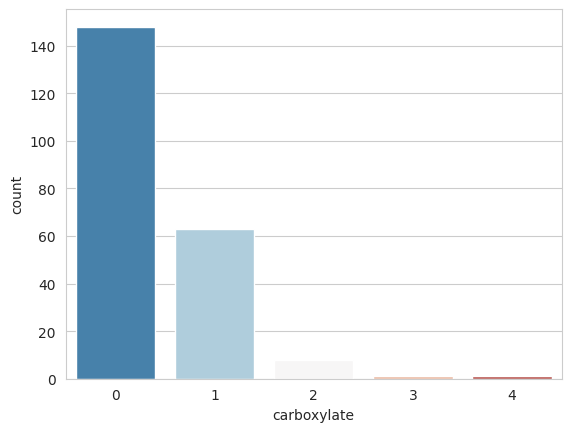

In [4]:
#Se procede a realizar el conteo de los targets a fin de determinar a cual le haremos un ML con SVM
sns.set_style('whitegrid')
sns.countplot(x='carboxylate',data=df0,palette='RdBu_r')
targets=list(df0.columns[1:8])
#l=list(df0.columns[1:7])


<ipython-input-5-c55b890195ee>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hydroxamate',data=df0,palette='RdBu_r')


<Axes: xlabel='hydroxamate', ylabel='count'>

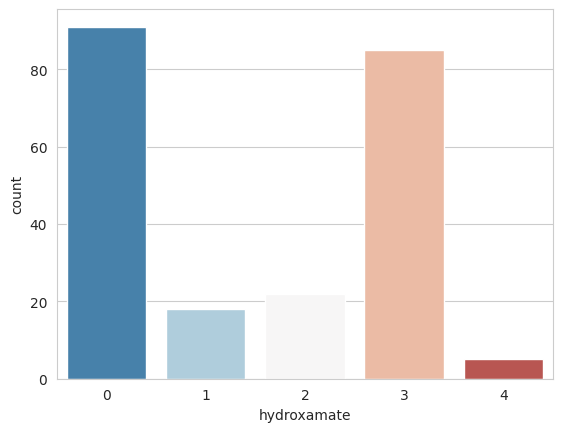

In [5]:
sns.countplot(x='hydroxamate',data=df0,palette='RdBu_r')


<ipython-input-6-d85e64380e8f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='catecholate',data=df0,palette='RdBu_r')


<Axes: xlabel='catecholate', ylabel='count'>

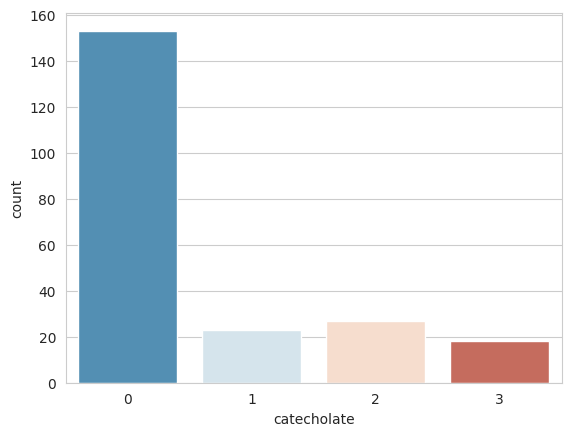

In [6]:
sns.countplot(x='catecholate',data=df0,palette='RdBu_r')


<ipython-input-7-f1cd29a8b0d3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='a-hydroxycarboxylate',data=df0,palette='RdBu_r')


<Axes: xlabel='a-hydroxycarboxylate', ylabel='count'>

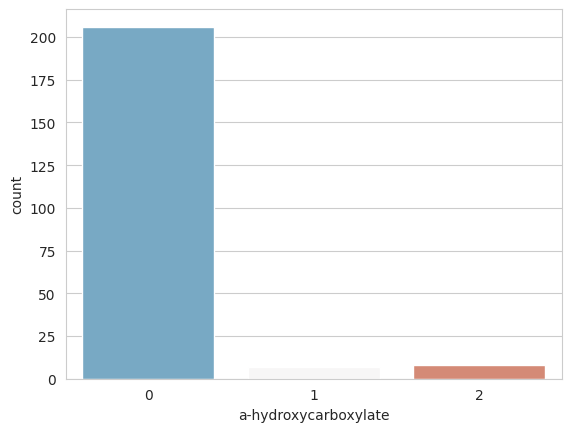

In [7]:
sns.countplot(x='a-hydroxycarboxylate',data=df0,palette='RdBu_r')


<ipython-input-8-bf4b5fb2ee0d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='phenolate',data=df0,palette='RdBu_r')


<Axes: xlabel='phenolate', ylabel='count'>

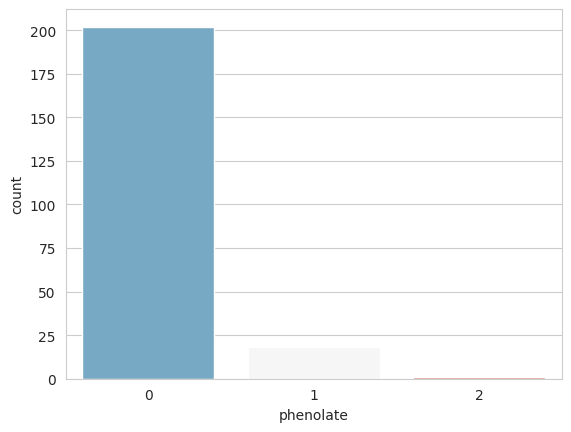

In [8]:
sns.countplot(x='phenolate',data=df0,palette='RdBu_r')

<ipython-input-9-8c15c2396c86>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='citrate',data=df0,palette='RdBu_r')


<Axes: xlabel='citrate', ylabel='count'>

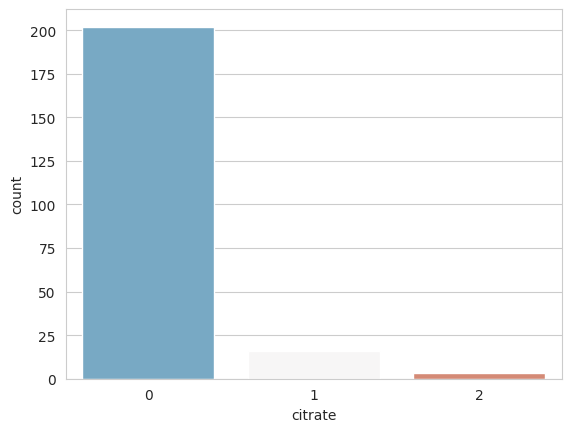

In [9]:
sns.countplot(x='citrate',data=df0,palette='RdBu_r')

<ipython-input-10-10791273a787>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='other',data=df0,palette='RdBu_r')


<Axes: xlabel='other', ylabel='count'>

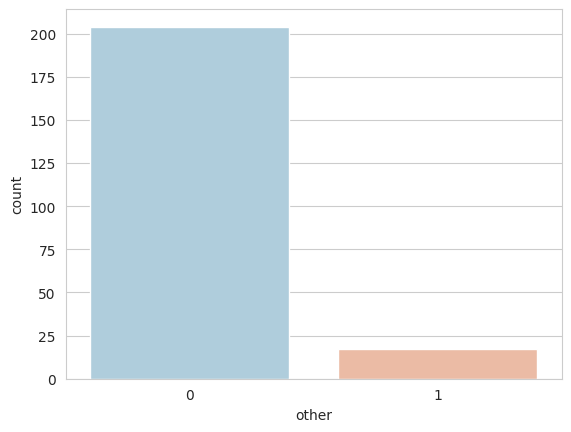

In [10]:
sns.countplot(x='other',data=df0,palette='RdBu_r')

In [15]:
#Se visualiza que hidroxymate es un target el  la cual se puede realizar una SVM ya que presenta una distribucion más equitativa entre sus clases, por lo que es mas
#óptimo obtener un ML.

#1-Normalizamos todos los datos int64,float 64 - (Normalización Min-Max)

df1_numeric= df1.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
df1_normalized = scaler.fit_transform(df1_numeric)

df1_new = pd.DataFrame(df1_normalized, columns=df1_numeric.columns)



# Combinar los datos normalizados con las columnas no numéricas
df1 = pd.concat([df1_new, df1.select_dtypes(exclude=['float64', 'int64'])], axis=1)

df1=df1.drop(columns=['ID'])

In [12]:
#df1 = df1.drop(columns=['ID'])  #   eliminamos columnas no relevantes
df3=df0['hydroxamate']
df3 #OBTENEMOS EL TARGET

0      0
1      0
2      0
3      0
4      0
      ..
216    2
217    0
218    0
219    0
220    0
Name: hydroxamate, Length: 221, dtype: int64

In [16]:

#Seleccionamos las caracteristicas mas importantes:
df1 = pd.concat([df1_new, df1.select_dtypes(exclude=['float64', 'int64'])], axis=1)

# Entrenar un clasificador de bosque aleatorio
clf = RandomForestClassifier()
clf.fit(df1, df3)

# Obtener los nombres de las características
nombres_caracteristicas = df1.columns

# Seleccionar características basadas en la importancia del clasificador
selector = SelectFromModel(clf, prefit=True, threshold=None)
selector.fit(df1, df3)

# Obtener las características seleccionadas
caracteristicas_seleccionadas = nombres_caracteristicas[selector.get_support()]


df4=df1[caracteristicas_seleccionadas] # Obtenemos las caracteristicas mas trascendentales para realizar la clasificación
df4


,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MRHI,BalabanJ,Kappa2,...,VSA_EState7,VSA_EState8,FractionCSP3,fr_Ar_OH,fr_C_O_noCOO,fr_NH0,fr_N_O,fr_amide,fr_phenol,fr_phenol_noOrthoHbond
0,0.015725,0.984275,0.797381,0.607077,0.694075,0.742571,0.950500,0.554440,0.198952,0.008354,...,1.000000,1.000000,0.000000,0.333333,0.000000,0.0,0.0,0.000000,0.333333,0.166667
1,0.015721,0.984279,0.693789,0.686801,0.741140,0.793096,0.943377,0.452237,0.189653,0.055597,...,1.000000,0.963241,0.130268,0.333333,0.071429,0.0,0.0,0.076923,0.333333,0.333333
2,0.015721,0.984279,0.728969,0.657323,0.730989,0.777460,0.883770,0.328187,0.209252,0.077739,...,1.000000,0.960187,0.234483,0.333333,0.071429,0.0,0.0,0.076923,0.333333,0.333333
3,0.015721,0.984279,0.730807,0.645041,0.726759,0.760877,0.846136,0.320053,0.225064,0.082850,...,0.968858,0.958736,0.319749,0.333333,0.071429,0.0,0.0,0.076923,0.333333,0.333333
4,0.003379,0.996621,0.796446,0.686801,0.741140,0.805178,0.885811,0.543287,0.194802,0.005638,...,1.000000,1.000000,0.000000,0.166667,0.000000,0.0,0.0,0.000000,0.166667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.123748,0.876252,0.725205,0.653072,0.771009,0.855365,0.784113,0.368041,0.091735,0.127100,...,0.932004,0.885606,0.351724,0.000000,0.000000,0.4,0.0,0.000000,0.000000,0.000000
217,0.015812,0.984188,0.879813,0.548993,0.646225,0.718188,0.886850,0.438885,0.005176,0.315297,...,0.925291,0.620880,0.508046,0.333333,0.214286,0.8,0.0,0.230769,0.333333,0.333333
218,0.015812,0.984188,0.879813,0.548993,0.646225,0.718188,0.886850,0.438885,0.005176,0.315297,...,0.925291,0.620880,0.508046,0.333333,0.214286,0.8,0.0,0.230769,0.333333,0.333333
219,0.015835,0.984165,0.879813,0.559065,0.663313,0.734818,0.879341,0.418875,0.005416,0.331164,...,0.924665,0.617534,0.529477,0.166667,0.214286,0.8,0.0,0.230769,0.166667,0.166667


In [17]:
#Se genera un Machine Learning
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df4, df3, test_size=0.20, random_state=101)
y_train

12     2
150    3
117    3
22     0
210    3
      ..
63     0
70     1
81     0
11     0
95     4
Name: hydroxamate, Length: 176, dtype: int64

In [18]:
#Se procede a realizar un ML mediante clasificacion SVC:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
model = SVC()

# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
model.fit(X_train,y_train)

Cross-validation scores: [0.83333333 0.85714286 0.82857143 0.88571429 0.82857143]
Mean cross-validation score: 0.8466666666666667


SVC()

In [19]:
predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[21  0  0  0]
 [ 0  1  1  0]
 [ 0  0  4  1]
 [ 1  0  0 16]]


In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.50      0.67         2
           2       0.80      0.80      0.80         5
           3       0.94      0.94      0.94        17

    accuracy                           0.93        45
   macro avg       0.92      0.81      0.85        45
weighted avg       0.93      0.93      0.93        45



In [27]:
#Aplicamos Hiperparametros para este clasificador SVM:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Cargar datos
X=df4
y=df3

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svc = SVC()


parameters = {
    'C': [0.1, 1, 10, 100],  # Valores comunes para la regularización
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Configurar las métricas de puntuación
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro',zero_division=1),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=parameters, cv=5, scoring=scoring, refit='accuracy', return_train_score=True)

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los resultados de las métricas de puntuación para los mejores parámetros
results = grid_search.cv_results_
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score de validación cruzada (accuracy):", grid_search.best_score_)
print("Resultados de validación cruzada para cada métrica:")
for metric in scoring.keys():
    print(f'{metric.capitalize()}:')
    for fold in range(grid_search.n_splits_):
        key = f'split{fold}_test_{metric}'
        print(f'Fold {fold+1}: {results[key][grid_search.best_index_]}')

# Evaluar en el conjunto de prueba usando la métrica refit (accuracy en este caso)
test_scores = grid_search.score(X_test, y_test)
print("Scores en el conjunto de prueba:", test_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Mejores parámetros: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Mejor score de validación cruzada (accuracy): 0.9373015873015873
Resultados de validación cruzada para cada métrica:
Accuracy:
Fold 1: 0.9722222222222222
Fold 2: 0.9142857142857143
Fold 3: 0.8571428571428571
Fold 4: 0.9714285714285714
Fold 5: 0.9714285714285714
Precision:
Fold 1: 0.9882352941176471
Fold 2: 0.8833333333333333
Fold 3: 0.7375
Fold 4: 0.984375
Fold 5: 0.9875
Recall:
Fold 1: 0.95
Fold 2: 0.75
Fold 3: 0.7821428571428573
Fold 4: 0.9166666666666666
Fold 5: 0.9846153846153847
F1_score:
Fold 1: 0.9653679653679653
Fold 2: 0.7916666666666667
Fold 3: 0.7550264550264549
Fold 4: 0.9419354838709677
Fold 5: 0.9855483870967742
Scores en el conjunto de prueba: 0.9333333333333333


In [28]:
# Configurar las métricas de puntuación
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import expon


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro',zero_division=1),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svc, param_distributions=parameters, n_iter=100, cv=5, scoring=scoring, refit='accuracy', return_train_score=True, random_state=42)

# Ejecutar RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mostrar los resultados de las métricas de puntuación para los mejores parámetros
results = random_search.cv_results_
print("Mejores parámetros:", random_search.best_params_)
print("Mejor score de validación cruzada (accuracy):", random_search.best_score_)
print("Resultados de validación cruzada para cada métrica:")
for metric in scoring.keys():
    for fold in range(random_search.n_splits_):
        key = f'split{fold}_test_{metric}'
        print(f'{metric.capitalize()} - Fold {fold+1}: {results[key][random_search.best_index_]}')

# Evaluar en el conjunto de prueba usando la métrica refit (accuracy en este caso)
test_scores = random_search.score(X_test, y_test)
print("Scores en el conjunto de prueba:", test_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Mejores parámetros: {'kernel': 'poly', 'gamma': 'scale', 'C': 1}
Mejor score de validación cruzada (accuracy): 0.9373015873015873
Resultados de validación cruzada para cada métrica:
Accuracy - Fold 1: 0.9722222222222222
Accuracy - Fold 2: 0.9142857142857143
Accuracy - Fold 3: 0.8571428571428571
Accuracy - Fold 4: 0.9714285714285714
Accuracy - Fold 5: 0.9714285714285714
Precision - Fold 1: 0.9882352941176471
Precision - Fold 2: 0.8833333333333333
Precision - Fold 3: 0.7375
Precision - Fold 4: 0.984375
Precision - Fold 5: 0.9875
Recall - Fold 1: 0.95
Recall - Fold 2: 0.75
Recall - Fold 3: 0.7821428571428573
Recall - Fold 4: 0.9166666666666666
Recall - Fold 5: 0.9846153846153847
F1_score - Fold 1: 0.9653679653679653
F1_score - Fold 2: 0.7916666666666667
F1_score - Fold 3: 0.7550264550264549
F1_score - Fold 4: 0.9419354838709677
F1_score - Fold 5: 0.9855483870967742
Scores en el conjunto de prueba: 0.9333333333333333


In [ ]:
#No hay un cambio significativo en si se utiliza las 2 opciones de búsqueda de candidatos de GridSearch o randomSearch.